In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()
sns.set_context("talk")

In [2]:
# #! /usr/bin/python3

# ########################################################
# # EEG data preprocess for 1D/2D/3D
# ########################################################
# import argparse
# import os
# # import pyedflib
# import numpy as np
# import pandas as pd
# import pickle

# np.random.seed(0)

# def print_top(dataset_dir, window_size, height, width, normalize, overlap, begin_subject, end_subject, output_dir, store):
# 	print("######################## PhysioBank EEG data preprocess ########################	\
# 		   \n#### Author: Dalin Zhang	UNSW, Sydney	email: zhangdalin90@gmail.com #####	\
# 		   \n# input directory:	%s \
# 		   \n# window size:		%d 	\
# 		   \n# height:	%d 	\
# 		   \n# width:	%d 	\
# 		   \n# normalize:	%s 	\
# 		   \n# overlap:	%s 	\
# 		   \n# begin subject:	%d 	\
# 		   \n# end subject:		%d 	\
# 		   \n# store:	%s	\
# 		   \n# output directory:	%s	\
# 		   \n##############################################################################"% \
# 			(dataset_dir,	\
# 			window_size,	\
# 			height,	\
# 			width,	\
# 			normalize,	\
# 			overlap,	\
# 			begin_subject,	\
# 			end_subject,	\
# 			store,	\
# 			output_dir))
# 	return None

# def data_1Dto2D(data, Y, X):
# 	data_2D = np.zeros([Y, X])
# 	if Y == 1:
# 		data_2D[0, 0] = data[44]
# 		data_2D[0, 1] = data[24]
# 		data_2D[0, 2] = data[28]
# 		data_2D[0, 3] = data[45]
# 	elif Y == 2:
# 		data_2D[0] = ( 	   	 0, 	   data[24],  	   	 data[28], 	   0) 
# 		data_2D[1] = (	  	 data[44], 	   	  0,  	   	 	  	0, 	   data[45]) 
# 	elif Y == 10:
# 		data_2D[0] = ( 	   	 0, 	   0,  	   	 0, 	   0,        0,        0,        0, 	   0,  	     0, 	   0, 	 	 0) 
# 		data_2D[1] = (	  	 0, 	   0,  	   	 0, data[24],        0,        0,        0, data[28], 	   	 0,   	   0, 	 	 0) 
# 		data_2D[2] = (	  	 0,        0,        0,        0,        0,        0,        0,        0,        0,        0, 	 	 0) 
# 		data_2D[3] = (	  	 0,        0,        0,        0,        0,        0,        0,        0,        0,        0, 		 0) 
# 		data_2D[4] = (       0,        0,        0,        0,        0,        0,        0,        0,        0,        0,        0) 
# 		data_2D[5] = (	  	 0, data[44],        0,        0,        0,        0,        0,        0,        0, data[45], 		 0) 
# 		data_2D[6] = (	  	 0,        0,        0,        0,        0,        0,        0,        0,        0,        0, 		 0) 
# 		data_2D[7] = (	  	 0, 	   0, 	 	 0,        0,        0,        0,        0,        0, 	   	 0, 	   0, 		 0) 
# 		data_2D[8] = (	  	 0, 	   0, 	 	 0, 	   0,        0,        0,        0, 	   0, 	   	 0, 	   0, 		 0) 
# 		data_2D[9] = (	  	 0, 	   0, 	 	 0, 	   0, 	     0,        0, 		 0, 	   0, 	   	 0, 	   0, 		 0) 
# 	else:
# 		raise ValueError('Unavailable mesh height: ', Y)
# 	return data_2D

# def dataset_1Dto2D(dataset_1D, height, width):
# 	dataset_2D = np.zeros([dataset_1D.shape[0], height, width])
# 	for i in range(dataset_1D.shape[0]):
# 		dataset_2D[i] = data_1Dto2D(dataset_1D[i], height, width)
# 	# print(dataset_2D)
# 	return dataset_2D

# def windows(data, size, overlap):
# 	start = 0
# 	while ((start+size) < data.shape[0]):
# 		yield int(start), int(start + size)
# 		if overlap == True:
# 			start += (size/2)
# 		else:
# 			start += size
# def norm_dataset(dataset_1D):
# 	scalers = []
# 	norm_dataset_1D = np.zeros([dataset_1D.shape[0], 64])
# 	for i in range(dataset_1D.shape[1]):
# 		norm_dataset_1D[:, i], scaler = feature_normalize(dataset_1D[:, i])
# 		scalers.append(scaler)
# 	return norm_dataset_1D, scalers
# def feature_normalize(data):
# 	mean = data[data.nonzero()].mean()
# 	sigma = data[data.nonzero()].std()
# 	data_normalized = data
# 	data_normalized[data_normalized.nonzero()] = (data_normalized[data_normalized.nonzero()] - mean)/sigma
# 	return data_normalized, [mean, sigma]

# def segment_signal_without_transition(data, label, window_size, overlap):
# 	for (start, end) in windows(data, window_size, overlap):
# 		if((len(data[start:end]) == window_size) and (len(set(label[start:end]))==1)):
# 			if(start == 0):
# 				segments = data[start:end]
# 				# labels = stats.mode(label[start:end])[0][0]
# 				labels = np.array(list(set(label[start:end])))
# 			else:
# 				segments = np.vstack([segments, data[start:end]])
# 				labels = np.append(labels, np.array(list(set(label[start:end]))))
# 				# labels = np.append(labels, stats.mode(label[start:end])[0][0])
# 	return segments, labels

# def preprocess(dataset_dir, window_size, height, width, normalize, overlap, start=1, end=110):
# 	# initial empty label arrays
# 	label_inter	= np.empty([0])
# 	# initial empty data arrays
# 	data_inter	= np.empty([0, window_size, height, width])
# 	for j in range(start, end):
# 		if (j == 89):
# 			continue
# 		# get directory name for one subject
# 		data_dir = dataset_dir+"S"+format(j, '03d')
# 		# get task list for one subject
# 		task_list = [task for task in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, task))]
# 		for task in task_list:
# 			if(("R02" in task) or ("R04" in task) or ("R06" in task)): # R02: eye closed; R04, R06: motor imagery tasks
# 				print("Processing: " + task)
# 				# get data file name and label file name
# 				data_file 	= data_dir+"/"+task+"/"+task+".csv"
# 				label_file 	= data_dir+"/"+task+"/"+task+".label.csv"
# 				# read data and label
# 				data		= pd.read_csv(data_file)
# 				label		= pd.read_csv(label_file)
# 				# remove rest label and data during motor imagery tasks
# 				data_label	= pd.concat([data, label], axis=1)
# 				data_label	= data_label.loc[data_label['labels']!= 'rest']
# 				# get new label
# 				label		= data_label['labels']
# 				# get new data
# 				data_label.drop('labels', axis=1, inplace=True)
# 				data		= data_label.values
# 				# normalize
# 				if normalize == True:
# 					data, scalers = norm_dataset(data)
# 					print(len(scalers))
# 				# convert 1D data to 2D
# 				data		= dataset_1Dto2D(data, height, width)
# 				# segment data with sliding window 
# 				data, label	= segment_signal_without_transition(data, label, window_size, overlap)
# 				data		= data.reshape(int(data.shape[0]/window_size), window_size, height, width)
# 				# append new data and label
# 				data_inter	= np.vstack([data_inter, data])
# 				label_inter	= np.append(label_inter, label)
# 			else:
# 				pass
# 	return data_inter, label_inter

# if __name__ == '__main__':
# 	dataset_dir		=	"./dataset/raw_dataset/"
# 	window_size		=	10
# 	height, width = 1, 4
# 	begin_subject, end_subject = 1, 108
# 	normalize = False
# 	overlap = False
# 	output_dir		=	"../dataset/preprocessed_dataset/"
# 	store = False
# 	print_top(dataset_dir, window_size, height, width, normalize, overlap, begin_subject, end_subject, output_dir, store)
# 	confirm = input('Continue? y/n: ')
# 	if confirm == "y":
# 		data, label = preprocess(dataset_dir, window_size, height, width, normalize, overlap, begin_subject, end_subject+1)
# 		output_data = output_dir + str(begin_subject) + "_" + str(end_subject) + "_" + str(height) + "x" + str(width) + "_dataset_3D_win_" + str(window_size) + "_normalize_" + str(normalize) + "_overlap_" + str(overlap) + ".pkl"
# 		output_label = output_dir+str(begin_subject)+"_"+str(end_subject)+"_" + str(height) + "x" + str(width) + "_label_3D_win_"+str(window_size)+ "_normalize_" + str(normalize) + "_overlap_" + str(overlap) + ".pkl"
# 		if store == True:
# 			with open(output_data, "wb") as fp:
# 				pickle.dump(data, fp, protocol=4) 
# 			with open(output_label, "wb") as fp:
# 				pickle.dump(label, fp)
# 		print("Dataset preprocessing complete.")
# 	else:
# 		print("Dataset preprocessing cancelled.")

In [3]:
import pickle
dataset_dir = "./dataset/preprocessed_dataset/"
result_dir = "./results/"
with open(dataset_dir+"1_108_1x4_dataset_3D_win_10_normalize_False_overlap_False.pkl", "rb") as fp:
    dataset = pickle.load(fp)
with open(dataset_dir+"1_108_1x4_label_3D_win_10_normalize_False_overlap_False.pkl", "rb") as fp:
    labels = pickle.load(fp)
height = dataset.shape[2]
width = dataset.shape[3]
window_size = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Labels shape:", labels.shape)

Dataset shape: (309371, 10, 1, 4)
Labels shape: (309371,)


In [4]:
dataset.shape

(309371, 10, 1, 4)

In [5]:
dataset_2d = dataset.reshape(-1, 4)

In [6]:
dataset_2d.shape

(3093710, 4)

In [7]:
labels.shape

(309371,)

In [8]:
labels

array(['image_open&close_both_feet', 'image_open&close_both_feet',
       'image_open&close_both_feet', ..., 'eye_close', 'eye_close',
       'eye_close'], dtype='<U32')

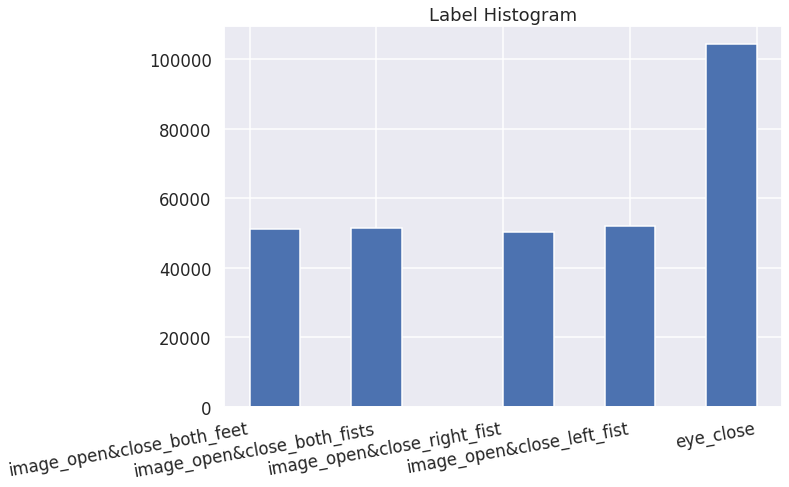

In [9]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
plt.hist(labels)
ax.set_title('Label Histogram') 
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='right')
plt.savefig("./images/hist_labels")
plt.show()

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [11]:
labels_encoded_long = np.resize(labels_encoded, labels_encoded.shape[0] * 10).reshape(-1, 10)

In [12]:
print(labels_encoded_long)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
labels_encoded_long.shape

(309371, 10)

In [14]:
labels_encoded_long = labels_encoded_long.reshape(-1)

In [15]:
df = pd.DataFrame(dataset_2d, columns=["TP9", "AF7", "AF8", "TP10"])

In [16]:
df["labels"] = labels_encoded_long

In [17]:
df["labels"].nunique()

5

In [ ]:
plt.figure(figsize=(10, 7))

In [ ]:
for i in range(5):
    plt.figure(figsize=(20, 10))
    sns.pairplot(df[df["labels"] == i], hue="labels", vars=["TP9", "AF7", "AF8", "TP10"], markers=".")
    plt.savefig("./images/pairplot_label_" + str(i))
    # sns.pairplot(df, hue="labels", diag_kind="hist", vars=["TP9", "AF7", "AF8", "TP10"])
    # plt.savefig("./images/pairplot_labels.png")
    # plt.legend(["a", "b", "c", "d", "e"])
    plt.clf()

KeyboardInterrupt: 

<Figure size 1440x720 with 0 Axes>

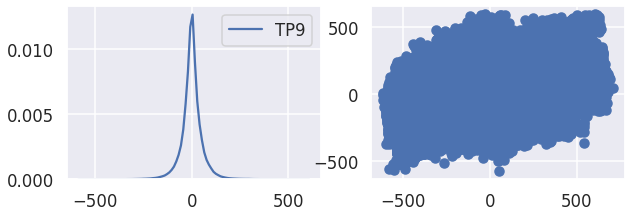

In [28]:
fig = plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.kdeplot(df["TP9"])

plt.subplot(2, 2, 2)
plt.scatter(df["AF7"], df["TP9"])

# plt.subplot(2, 2, 3)
# plt.plot(x, y)

# plt.subplot(2, 2, 4)
# plt.plot(x, y)

plt.show()

In [ ]:
plt.scatter(df["AF7"], df["TP9"]);

In [ ]:
plt.figure(figsize=(10, 7))
sns.pairplot(df[df["labels"] == 2], hue="labels", vars=["TP9", "AF7", "AF8", "TP10"])
# plt.savefig("./images/pairplot.png")
# sns.pairplot(df, hue="labels", diag_kind="hist", vars=["TP9", "AF7", "AF8", "TP10"])
# plt.savefig("./images/pairplot_labels.png")
# plt.legend(["a", "b", "c", "d", "e"])
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
sns.pairplot(df[df["labels"] == 3], hue="labels", vars=["TP9", "AF7", "AF8", "TP10"])
# plt.savefig("./images/pairplot.png")
# sns.pairplot(df, hue="labels", diag_kind="hist", vars=["TP9", "AF7", "AF8", "TP10"])
# plt.savefig("./images/pairplot_labels.png")
# plt.legend(["a", "b", "c", "d", "e"])
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
sns.pairplot(df[df["labels"] == 4], hue="labels", vars=["TP9", "AF7", "AF8", "TP10"])
# plt.savefig("./images/pairplot.png")
# sns.pairplot(df, hue="labels", diag_kind="hist", vars=["TP9", "AF7", "AF8", "TP10"])
# plt.savefig("./images/pairplot_labels.png")
# plt.legend(["a", "b", "c", "d", "e"])
plt.show()

<Figure size 720x504 with 0 Axes>

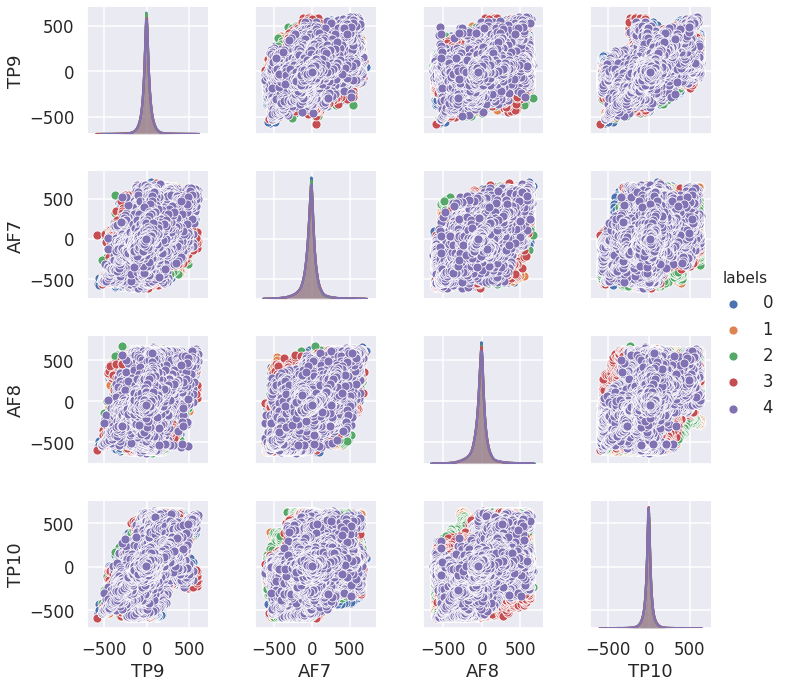

In [40]:
plt.figure(figsize=(10, 7))
sns.pairplot(df, hue="labels", vars=["TP9", "AF7", "AF8", "TP10"])
plt.savefig("./images/pairplot.png")
# sns.pairplot(df, hue="labels", diag_kind="hist", vars=["TP9", "AF7", "AF8", "TP10"])
# plt.savefig("./images/pairplot_labels.png")
# plt.legend(["a", "b", "c", "d", "e"])
plt.show()

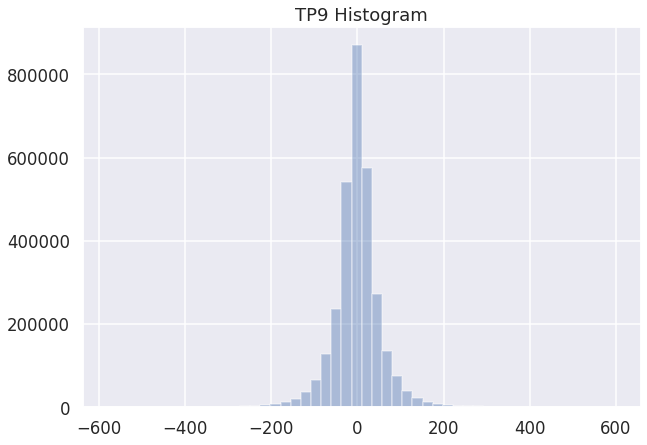

In [41]:
plt.figure(figsize=(10, 7))
sns.distplot(dataset_2d[:, 0], kde=False)
# plt.hist(dataset_2d[:, 0], bins=100)
plt.title("TP9 Histogram")
plt.savefig("./images/hist_tp9.png")
plt.show()

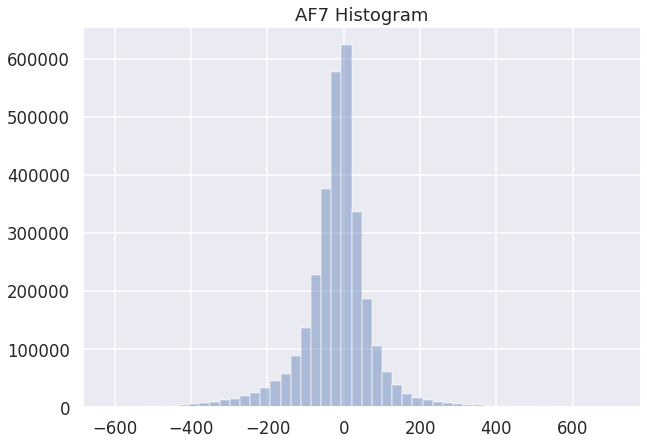

In [42]:
plt.figure(figsize=(10, 7))
sns.distplot(dataset_2d[:, 1], kde=False)
# plt.hist(dataset_2d[:, 1], bins=100)
plt.title("AF7 Histogram")
plt.savefig("./images/hist_af7.png")
plt.show()

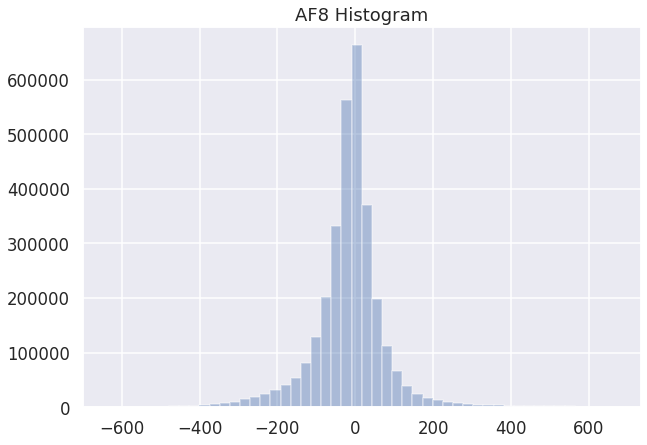

In [43]:
plt.figure(figsize=(10, 7))
sns.distplot(dataset_2d[:, 2], kde=False)
# plt.hist(dataset_2d[:, 2], bins=100)
plt.title("AF8 Histogram")
plt.savefig("./images/hist_af8.png")
plt.show()

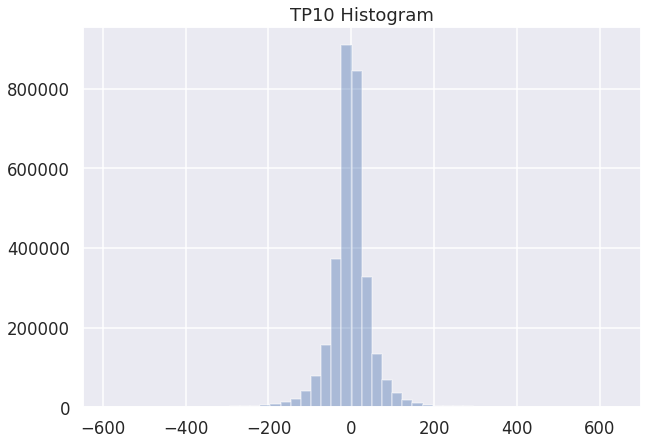

In [44]:
plt.figure(figsize=(10, 7))
sns.distplot(dataset_2d[:, 3], kde=False)
# plt.hist(dataset_2d[:, 3], bins=100)
plt.title("TP10 Histogram")
plt.savefig("./images/hist_tp10.png")
plt.show()